<a href="https://colab.research.google.com/github/JeffersonEstevo/Projeto-Ciencia-de-Dados/blob/main/Projeto_CD_Parte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disciplina: Ciência de Dados (DCA-0131)
Aunos: 

Jefferson Estevo 

José Augusto Agripino de Oliveira
<br><br>

Prof. Luiz Affonso Guedes
<br><br>

### Departamento de Engenharia de Computação e Automação - DCA

UFRN - 2023

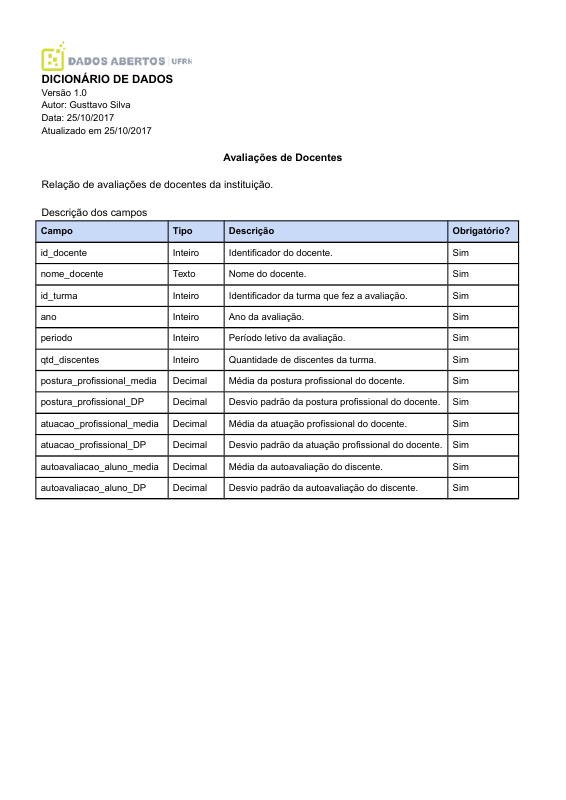

In [ ]:
# PDF com as informações da base de dados

# !apt-get install poppler-utils
# !pip install pdf2image

from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image

images = convert_from_bytes(open('sample_data/dicionario-de-dados---avaliacoes-de-docentes.pdf', 'rb').read(), size=800)
display(images[0])

In [ ]:
# Importação das bibliotecas numpy e pandas 
import numpy as np
import pandas as pd

In [ ]:
# Carrrgamento do arquivo csv que será trabalhado
dados = pd.read_csv('sample_data/avaliacaodocencia.csv')
dados.head()

,id_docente,nome_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP
0,15370,FERNANDO MOREIRA DA SILVA,1209923,2013,2,14,9.17,1.34,8.13,2.70,7.61,2.53
1,15370,FERNANDO MOREIRA DA SILVA,1222008,2014,1,15,9.44,0.92,7.17,3.08,8.71,1.72
2,15370,FERNANDO MOREIRA DA SILVA,1222218,2014,1,38,9.19,1.67,6.77,3.29,8.12,2.53
3,15370,FERNANDO MOREIRA DA SILVA,1229520,2014,2,13,9.06,1.16,7.68,2.51,7.62,2.77
4,15370,FERNANDO MOREIRA DA SILVA,1229545,2014,2,24,9.27,1.28,8.45,1.72,8.48,1.86


In [ ]:
# Para obter um pouco mais de iformações sobre o conjunto de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135085 entries, 0 to 135084
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id_docente                  135085 non-null  int64  
 1   nome_docente                135085 non-null  object 
 2   id_turma                    135085 non-null  int64  
 3   ano                         135085 non-null  int64  
 4   periodo                     135085 non-null  int64  
 5   qtd_discentes               135085 non-null  int64  
 6   postura_profissional_media  135085 non-null  float64
 7   postura_profissional_DP     135085 non-null  float64
 8   atuacao_profissional_media  135085 non-null  float64
 9   atuacao_profissional_DP     135085 non-null  float64
 10  autoavaliacao_aluno_media   102991 non-null  float64
 11  autoavaliacao_aluno_DP      102991 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 12.4+ MB


In [ ]:
# Descrevendo um pouco do dataframe
dados.describe()

,id_docente,id_turma,ano,periodo,qtd_discentes,postura_profissional_media,postura_profissional_DP,atuacao_profissional_media,atuacao_profissional_DP,autoavaliacao_aluno_media,autoavaliacao_aluno_DP
count,1.350850e+05,1.350850e+05,135085.000000,135085.000000,135085.000000,135085.000000,135085.000000,135085.000000,135085.000000,102991.000000,102991.000000
mean,4.171154e+06,4.588327e+07,2017.508065,1.520990,22.173172,9.427273,0.921982,9.150417,1.317473,9.081774,1.495688
std,2.534934e+06,2.290499e+07,2.602534,0.499561,17.057441,0.695685,0.724981,0.737718,0.744314,0.589694,0.701043
min,1.537000e+04,1.207254e+06,2013.000000,1.000000,0.000000,0.340000,0.000000,0.500000,0.000000,4.340000,0.000000
25%,3.495000e+04,5.756696e+07,2015.000000,1.000000,8.000000,9.250000,0.390000,8.830000,0.800000,8.700000,1.020000
50%,5.753755e+06,5.761333e+07,2018.000000,2.000000,18.000000,9.650000,0.800000,9.320000,1.250000,9.120000,1.540000
75%,5.757489e+06,5.764970e+07,2019.000000,2.000000,32.000000,9.880000,1.300000,9.670000,1.760000,9.540000,1.990000
max,5.762753e+06,5.770232e+07,2022.000000,2.000000,306.000000,10.000000,7.070000,10.000000,4.830000,10.000000,4.270000


In [ ]:
# Número de linhas, número de colunas
dados.shape

(135085, 12)

In [ ]:
qtd_professores = dados['nome_docente'].unique()
qtd_professores = len(qtd_professores)
print("Quantidade de professores entre os anos de 2013 a 2022 = ", qtd_professores)

Quantidade de professores entre os anos de 2013 a 2022 =  4631


In [ ]:
qtd_alunos = dados['qtd_discentes'].sum()
print("Quantidade de alunos entre os anos de 2013 a 2022 = ", qtd_alunos)

Quantidade de alunos entre os anos de 2013 a 2022 =  2995263


In [ ]:

postura = dados['postura_profissional_media']

# Quantidade de professores com nota máxima
qtd_nota10 = int(postura[postura == 10.0].count())
print("Quantidade de professores com nota 10: ", qtd_nota10)

porcentagem = '{0:.2f}%'.format(qtd_nota10/len(postura)*100)
print("Porcentagem  de professores com nota 10: ", porcentagem)

# Primeiro professor a receber nota 10
#print("Nota: ", dados['postura_profissional_media'][35])
print(postura[postura == 10.0])
print("Primeiro professor a receber nota 10: ", dados['nome_docente'][35])

Quantidade de professores com nota 10:  16908
Porcentagem  de professores com nota 10:  12.52%
35        10.0
57        10.0
122       10.0
183       10.0
199       10.0
          ... 
134995    10.0
134996    10.0
135004    10.0
135006    10.0
135070    10.0
Name: postura_profissional_media, Length: 16908, dtype: float64
Primeiro professor a receber nota 10:  ALMIR MIRANDA FERREIRA
